In [1]:
import numpy as np
from algorithms.ml.reinforcement.applications.whot.src.suit import *
from algorithms.ml.reinforcement.applications.whot.src.model import Model
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from algorithms.ml.reinforcement.applications.whot.src.params import *
from algorithms.ml.reinforcement.applications.whot.src.build import build_model
from algorithms.ml.reinforcement.applications.whot.src.dqnagent import DQNAgent
import os
import copy
import tensorflow as tf
import json
from collections import deque
import pickle

In [2]:
Q = np.zeros(shape=(NUM_STATES, NUM_ACTIONS))
epsilon = 1.0

In [3]:
# Q = np.load("Whot_Q_table.npy")
# epsilon = np.load("Whot_epsilon.npy")[0]

In [4]:
moving_deltas = deque(maxlen=100)
replay_buffer = deque(maxlen=100000)

In [5]:
history = []
verbose = False
NUM_EPISODES= 50000
versus = 0

Whot game training loop

In [6]:
for episode in range(NUM_EPISODES):
    first_turn = np.random.choice([True, False])
    force_winner = np.random.choice([True, False])
    mode = np.random.choice(['Easy', 'Difficult'])
    valid_deal_nums = [num for num in list(range(6, 27)) if num % 2 == 0]
    deal_num = np.random.choice(valid_deal_nums)
    old_Q = copy.deepcopy(Q)
    model = Model(Q, 
                  training=True,
                  replay_buffer=replay_buffer,
                  model=None, 
                  epsilon=epsilon, 
                  force_winner=force_winner,
                  deal_num=deal_num,
                  learning_rate=learning_rate,
                  gamma=gamma,
                  tau=tau,
                  mode=mode,
                  first_turn=first_turn,
                  verbose=verbose,
                  versus=versus,
                  history=history)
    model.train()
    epsilon = max(epsilon_min, epsilon * decay_rate)
    if episode % np.ceil(NUM_EPISODES / 10) == 0 or episode == (NUM_EPISODES - 1):
        print(f"Episode {episode}: epsilon={epsilon:.3f}, Max delta={max_delta:.3f}")
        np.save("Whot_Q_table.npy", Q)
        np.save("Whot_epsilon.npy", np.array([epsilon]))
        delta = abs(Q - old_Q)
        max_delta = np.max(delta)
        moving_deltas.append(max_delta)
        if len(moving_deltas) == 100 and np.mean(moving_deltas) < convergent_threshold:
            print("Q-table convergent criteria met.")
            break
                
print(f"Training completed after {NUM_EPISODES} episode{'s' if NUM_EPISODES > 1 else ''}.")
print("Whot_Q_tables have been saved.")

Episode 0: epsilon=1.000, Max delta=0.000
Episode 5000: epsilon=0.100, Max delta=22.862
Episode 10000: epsilon=0.100, Max delta=10.000
Episode 15000: epsilon=0.100, Max delta=0.745
Episode 20000: epsilon=0.100, Max delta=15.006
Episode 25000: epsilon=0.100, Max delta=9.671
Episode 30000: epsilon=0.100, Max delta=9.718
Episode 35000: epsilon=0.100, Max delta=10.312
Episode 40000: epsilon=0.100, Max delta=6.337
Episode 45000: epsilon=0.100, Max delta=12.986
Episode 49999: epsilon=0.100, Max delta=1.888
Training completed after 50000 episodes.
Whot_Q_tables have been saved.


In [7]:
file = "C:/Users/Matho/Documents/whots/models/data/Whot_replay_buffer.pkl"

In [8]:
with open(file, 'wb') as f:
    pickle.dump(replay_buffer, f)
print(f"Model saved to {file}")

Model saved to C:/Users/Matho/Documents/whots/models/data/Whot_replay_buffer.pkl


In [9]:
with open(file, 'rb') as f:
    replay_buffer = pickle.load(f)

In [10]:
# folder_path = 'C:/Users/Matho/Documents/whots'
# # L = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
# L = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]
# print(len(L))

In [11]:
# Q

In [12]:
epsilon

0.1

In [13]:
history = np.array(history)
len(history)

50000

In [14]:
len(history[history == 1]) # Agent lose by opponent (rule-based engine) emptying cards first

346

In [15]:
len(history[history == 0]) # Agent win by emptying card first

28315

In [16]:
len(history[history == 3]) # Agent win by counting

18095

In [17]:
len(history[history == 4]) # Agent lose by counting

3193

In [18]:
len(history[history == 2]) # Tie by counting

51

In [19]:
max_delta

8.759787093554237

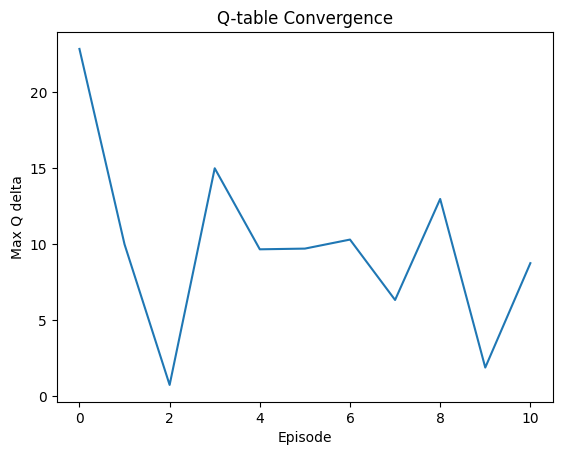

In [20]:
plt.plot(moving_deltas)
plt.xlabel("Episode")
plt.ylabel("Max Q delta")
plt.title("Q-table Convergence")
plt.show()

In [21]:
# game = Model(Q, training=False, force_winner=True, versus=1, save_stats=True, model=None)
# game.play()

In [22]:
len(replay_buffer)

100000

In [23]:
NUM_ITERATIONS = 2000
batch_size = 1000
epochs=1

In [24]:
main_model = build_model(learning_rate, NUM_STATE_FEATURES)

In [25]:
target_model = build_model(learning_rate, NUM_STATE_FEATURES)

In [26]:
agent = DQNAgent(Q_table=Q, 
                replay_buffer=replay_buffer, 
                main_model=main_model,
                target_model=target_model,
                gamma=gamma, 
                tau=tau, 
                batch_size=batch_size,
                epochs=epochs)

In [27]:
for iter in range(NUM_ITERATIONS):
    agent.offline_train()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4644.0342
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4520.7153
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4347.5806
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4100.1885
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3823.5601
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3548.7014
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 3210.7981
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2783.7749
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2478.6035
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 2051.9863
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1691.0685
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1291.6732
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1138.5415
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 973.4228
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1043.2318
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1187.1512
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1197.7704
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1127.

In [28]:
main_model.save('offline_whot_main_model.keras')
target_model.save('offline_whot_target_model.keras')

In [29]:
agent = DQNAgent(Q_table=None, 
                replay_buffer=replay_buffer, 
                main_model=main_model,
                target_model=target_model,
                gamma=gamma, 
                tau=tau, 
                batch_size=batch_size,
                epochs=epochs)

In [30]:
for iter in range(NUM_ITERATIONS):
    agent.online_train()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 177.9217
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 85.5705
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 54.2820
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 96.6611
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 115.0959
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 89.9846
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 43.8856
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step
32/32 ━━━━━━━━━━━━

In [31]:
main_model.save('online_whot_main_model.keras')
target_model.save('online_whot_target_model.keras')

In [32]:
loaded_offline_main_model = load_model('offline_whot_main_model.keras')
loaded_offline_target_model = load_model('offline_whot_target_model.keras')
loaded_online_main_model = load_model('online_whot_main_model.keras')
loaded_online_target_model = load_model('online_whot_target_model.keras')

C:\Users\Matho\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [33]:
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_offline_main_model)
tflite_model = converter.convert()

with open("offline_whot_main_model.tflite", "wb") as f:
    f.write(tflite_model)

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_offline_target_model)
tflite_model = converter.convert()

with open("offline_whot_target_model.tflite", "wb") as f:
    f.write(tflite_model)

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_online_main_model)
tflite_model = converter.convert()

with open("online_whot_main_model.tflite", "wb") as f:
    f.write(tflite_model)

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_online_target_model)
tflite_model = converter.convert()

with open("online_whot_target_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Matho\AppData\Local\Temp\tmplceres51\assets


INFO:tensorflow:Assets written to: C:\Users\Matho\AppData\Local\Temp\tmplceres51\assets


Saved artifact at 'C:\Users\Matho\AppData\Local\Temp\tmplceres51'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 74), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 17), dtype=tf.float32, name=None)
Captures:
  2675786659216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675786655952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675786659792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675786660752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675786660368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675788482896: TensorSpec(shape=(), dtype=tf.resource, name=None)
INFO:tensorflow:Assets written to: C:\Users\Matho\AppData\Local\Temp\tmp6yvesnuh\assets


INFO:tensorflow:Assets written to: C:\Users\Matho\AppData\Local\Temp\tmp6yvesnuh\assets


Saved artifact at 'C:\Users\Matho\AppData\Local\Temp\tmp6yvesnuh'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 74), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 17), dtype=tf.float32, name=None)
Captures:
  2675788483856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675788487120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675788496720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675788486160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675788495952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675788495184: TensorSpec(shape=(), dtype=tf.resource, name=None)
INFO:tensorflow:Assets written to: C:\Users\Matho\AppData\Local\Temp\tmpjaqb_qh5\assets


INFO:tensorflow:Assets written to: C:\Users\Matho\AppData\Local\Temp\tmpjaqb_qh5\assets


Saved artifact at 'C:\Users\Matho\AppData\Local\Temp\tmpjaqb_qh5'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 74), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 17), dtype=tf.float32, name=None)
Captures:
  2675851642064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675851657040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675851655504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675851652816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675851656080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2675851656272: TensorSpec(shape=(), dtype=tf.resource, name=None)
INFO:tensorflow:Assets written to: C:\Users\Matho\AppData\Local\Temp\tmp0traam01\assets


INFO:tensorflow:Assets written to: C:\Users\Matho\AppData\Local\Temp\tmp0traam01\assets


Saved artifact at 'C:\Users\Matho\AppData\Local\Temp\tmp0traam01'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 74), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 17), dtype=tf.float32, name=None)
Captures:
  2676070890000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2676070890576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2676070890384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2676070891152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2676070891344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2676046168720: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [34]:
with open("Whot_Q_table.json", "w") as f:
    json.dump(Q.tolist(), f)

In [35]:
# game = Model(Q=None, training=False, force_winner=True, versus=1, save_stats=True, model=loaded_model)
# game.play()

A head-to-head Whot game encounter between the Q-table based-agent and Keras model-based agent.

In [51]:
history = []
for episode in range(100):
    first_turn = np.random.choice([True, False])
    force_winner = np.random.choice([True, False])
    mode = np.random.choice(['Easy', 'Difficult'])
    valid_deal_nums = [num for num in list(range(6, 27)) if num % 2 == 0]
    deal_num = np.random.choice(valid_deal_nums)
    game = Model(Q=Q, 
                 training=False, 
                 mode=mode, 
                 deal_num=deal_num,
                 force_winner=False, 
                 versus=2, 
                 save_stats=False,
                 first_turn=first_turn,
                 verbose=False,
                 history=history,
                 model=loaded_offline_target_model)
    game.play()

In [52]:
history = np.array(history)

In [53]:
len(history[history == 1]) # Q win emptying cards first

18

In [54]:
len(history[history == 4]) # Q win by counting

33

In [55]:
len(history[history == 0]) # Model win by emptying card first

18

In [56]:
len(history[history == 3]) # Model win by counting

30

In [57]:
len(history[history == 2]) # Tie by counting

1